# AI in Medicine: Data Science - Basics II

## Python Programming: Data Visualisation using *matplotlib*

- **Instructor**: Moritz Seiler, AG Ritter, Charité - Universitätsmedizin Berlin (moritz.seiler@charite.de)
- **Target audience**: Medical students from Charité
- **Course date**: February 2021

## 1. Aim of this session.

This tutorial introduces **data visualisation** in Python using ***matplotlib***. You'll learn how to create basic statistical plots using RKI's Covid-19 dataset.


## 2. Learning goals

### Theory

Data visualisation
- Definition
- Steps

### Practical

1. Data set<br>
2. matplotlib
    - Installation & Import
    - Basics in *matplotlib*
    - Workflow in *matplotlib*
    - Charting types in *matplotlib*
    - Examples 
    - Save plot
    - Exercises

## 3. References

- Data visualisation<br>
https://www.cs.unm.edu/~pgk/IVCDs14/minitufte.pdf<br>
https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/ch01.html
- matplotlib<br>
https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py<br>
https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
- RKI COVID-19 dataset for Berlin<br>
https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data?orderBy=Bundesland&where=Bundesland%20%3D%20%27Berlin%27

## 4. Theory

See accompanying [slide deck](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/slides/week1_session4_intro_to_ml_and_scikit_learn.pdf).

## 5. Practical

### 5.1 Data set

We'll again work with the Robert-Koch-Institut (RKI) Covid-19 dataset that you already know from the previous tutorials.

*Source: Robert Koch-Institut (RKI), dl-de/by-2-0*

So let's first read in the dataset as you've learned it in the previous tutorial using the `read_csv()` function in *pandas*. Furthermore, we transform the entries in the column *Meldedatum* from string into a datetime format with the *pandas* function `to_datetime()` which allows you e.g. to do calculations with those dates.

In [2]:
# Import the Pandas and NumPy library
import pandas as pd
import numpy as np

# Read in the RKI Covid-19 data set
covid19 = pd.read_csv("https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/data/20200705_COVID19_RKI.csv")

# Transform string into datetime format
covid19['Meldedatum'] = pd.to_datetime(covid19['Meldedatum'])

In [3]:
covid19.head()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,15892824,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020-03-14,1001,"05.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,15892825,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020-03-19,1001,"05.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,15892826,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020-03-19,1001,"05.07.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,15892827,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020-03-21,1001,"05.07.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,15892828,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020-03-27,1001,"05.07.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [4]:
covid19.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

### 5.2 matplotlib

Matplotlib is a Python 2D plotting library which produces publication-quality figures. It was designed to serve two purposes:

1) allow for interactive, cross-platform control of figures and plots,<br>
2) make it easy to produce static raster or vector graphics files without the need for any GUIs.   

<br><br>

<center><i>"Matplotlib tries to make easy things easy and hard things possible."</center>
    
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="40%">

*Source: https://matplotlib.org/_static/logo2_compressed.svg*

### Installation

Matplotlib is available on Colab, but if you are using this from any other place, you may install it with the following command (copy it in a Code cell):

```python
!pip install matplotlib
```

### Importing the library

A library is imported using the command *import*. In the following, we will use the *pyplot* module, which we will call *plt*.

In [5]:
# Import the pyplot module
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Basics in *matplotlib*

In *matplotlib*, there are several common approaches to plotting with matplotlib:

- object-oriented API,
- *pyplot* API.
- *pylab* API *(not recommended)*

In this tutorial, we'll focus on the object-oriented approach which is recommended to use, especially when you want to create complex graphics, because it gives you more control over the figure. *Pyplot* on the other hand is just a *MATLAB*-like module of the *matplotlib* library which is mainly intended for interactive
plots and simple cases of programmatic plot generation. The syntax of both approaches is quite similiar, so if you know the object-oriented approach, you won't have a problem to work with the *pyplot* module.

Before we'll create our first plot, we need to look at the parts of a *matplotlib* figure:

-**Figure**<br>
The whole figure.<br>
-**Axes**<br>
This is what you think of as ’a plot’, it is the region of the image with the
data space. A given figure can contain many Axes, but a given Axes
object can only be in one Figure.<br>
-**Axis**<br>
These are the number-line-like objects. They take care of setting the
graph limits and generating the ticks (the marks on the axis) and
ticklabels (strings labeling the ticks)<br>
-**Artist**<br>
Basically everything you can see on the figure is an artist (even the
Figure, Axes, and Axis objects)

<img src="https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png" width="50%">

*Source: https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png*

So, let's create our first plot using *matplotlib*.

### Workflow in *matplotlib*

Plotting in *matplotlib* follows a certain rountine which includes the following steps:

1. **Prepare data**
2. **Create plot**
3. **Plot**
4. **Customise plot**
5. **Save plot**
6. **Show plot**

#### 1. Prepare data

So, let's first create a small data set for a simple visualization using *matplotlib*.

In [6]:
# Generate data set (STEP 1)
x = [1,2,3,4]
y = [1,2,3,4]

#### 2. Create a plot

When using the object-oriented approach, we have to initialize the objects *Figure* and *Axes* first. This is commonly done by calling the `pyplot.figure()` function and adding the *Axes* object via `pyplot.add_axes()`.

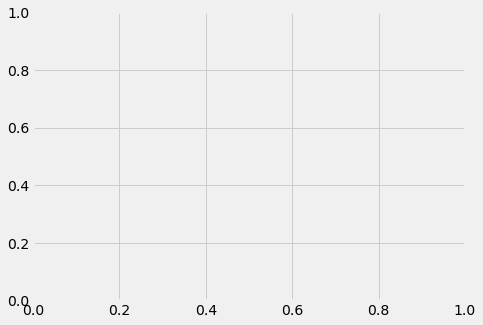

In [7]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig = plt.figure()
ax = fig.add_axes( [0, 0, 1, 1]) # [bottom, top, width, height]

Alternatively, we can use `pyplot.subplots()` to initialize both the *Figure* and the *Axes* object. You can also generate several *Axes* objects in one *Figure*.

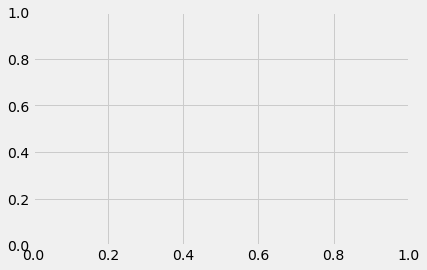

In [8]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(nrows=1, ncols=1) # 1 row, 1 column

#### 3. Plot + 4. Customise Plot

After that, we can simply use a plotting method on the *Axes* object. In this small example we're going to create a simple line graph.

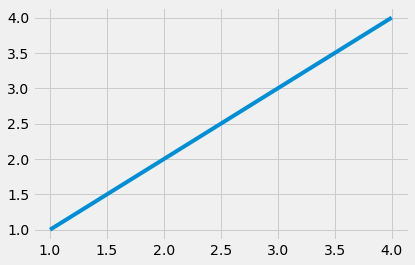

In [9]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(nrows=1, ncols=1) # 1 row, 1 column

### Step 3: Plot
ax.plot(x,y)

Before we move on, let's have a look at the *matplotlib* documentation of the line plot method:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

Alternatively, we can use the following command to open the documentation in the notebook.

In [10]:
ax.plot?

Signature: ax.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, 

#### Charting types in *matplotlib*

*Matplotlib* offers a huge amount of plotting methods/functions. A good starting point, so you don't have to start from scratch, is the *matplotlib* gallery, where you can find example code for some of these methods/functions (https://matplotlib.org/gallery/index.html). 

*Note: Interestingly, just about all methods of an Axes object exist as a function in the pyplot module (and vice-versa).*

A small list of *matplotlib* *Axes* methods:

- **Histogram:** ax.hist(x)
    * x: numerical (converted into categorical)
    * distribution of x
    
- **Box Plot:** ax.boxplot(x)
    * x: numerical
    * distribution of x / identification of outliers
- **Violin Plot:** ax.violinplot(x)
    * x: numerical
    * distribution of x 
- **Pie Chart:** ax.pie(x) *(not recommended)*
    * x: categorical
    * proportions of categories in x
- **Scatter Plot**:  ax.scatter(x,y)
    * x: numerical
    * y: numerical
    * joint distribution of x and y / identification of outliers
- **Line Plot**:  ax.plot(x, y)
    * x: numerical/categorical
    * y: numerical
    * function *(math.)* / time-series
- **Bar Plot**:  ax.bar(x, y) 
    * x: categorical
    * y: numerical (often count of x)
    * joint distribution of x and y / identification of outliers
- **Contour Plot**: ax.contour(X, Y, Z)
    * X: numerical
    * Y: numerical
    * Z: numerical
    * 3D surface on a 2D format
- ...

#### Examples

Let's look at some examples.

***Bar plot***

In our first example, we want to visualize the overall number of reported Covid-19 cases per state. For this, we use the variables *Bundesland* and *AnzahlFall*. Let's first have a look at those two variables.

In [11]:
covid19[['Bundesland', 'AnzahlFall']] # Step 1

,Bundesland,AnzahlFall
0,Schleswig-Holstein,1
1,Schleswig-Holstein,1
2,Schleswig-Holstein,1
3,Schleswig-Holstein,1
4,Schleswig-Holstein,1
...,...,...
158039,Thüringen,1
158040,Thüringen,1
158041,Thüringen,1
158042,Thüringen,2


We see that the each state occurs several times in our dataset. Let's add the variable *Meldedatum* and print the first 20 rows of the dataset.

In [12]:
covid19[['Bundesland', 'AnzahlFall', 'Meldedatum']].head(20)

,Bundesland,AnzahlFall,Meldedatum
0,Schleswig-Holstein,1,2020-03-14
1,Schleswig-Holstein,1,2020-03-19
2,Schleswig-Holstein,1,2020-03-19
3,Schleswig-Holstein,1,2020-03-21
4,Schleswig-Holstein,1,2020-03-27
5,Schleswig-Holstein,1,2020-04-04
6,Schleswig-Holstein,1,2020-04-06
7,Schleswig-Holstein,1,2020-04-07
8,Schleswig-Holstein,1,2020-04-09
9,Schleswig-Holstein,1,2020-05-29


We see, that we have time-series of reported cases. Since we are interested in the cumulative number of cases per state, we have to take the sum of the variable *AnzahlFall* for each state. This can simply be done by using the `groupby()` method from the *Pandas* library. We group our dataset by the variable *Bundesland* and then define the operation that is then applied to the grouped data which is the sum of the remaining variable *AnzahlFall*.

In [13]:
cases_state = covid19[['Bundesland','AnzahlFall']].groupby('Bundesland').sum() # Step 1

Let's print the result.

In [14]:
cases_state

,AnzahlFall
Bundesland,
Baden-Württemberg,35807
Bayern,48665
Berlin,8433
Brandenburg,3460
Bremen,1678
Hamburg,5220
Hessen,10939
Mecklenburg-Vorpommern,804
Niedersachsen,13664


Here, we see that the structure of our dataframe has changed; to restore the old structure we can use the `reset_index()` method.

In [15]:
cases_state = cases_state.reset_index() # Step 1

Let's print the result again.

In [16]:
cases_state

,Bundesland,AnzahlFall
0,Baden-Württemberg,35807
1,Bayern,48665
2,Berlin,8433
3,Brandenburg,3460
4,Bremen,1678
5,Hamburg,5220
6,Hessen,10939
7,Mecklenburg-Vorpommern,804
8,Niedersachsen,13664
9,Nordrhein-Westfalen,43990


Now, we have a dataframe with the old structure which can be used for our visualisation. So, let's use a barplot to visualise this table with states along the x-axis and the sums along the y-axis.

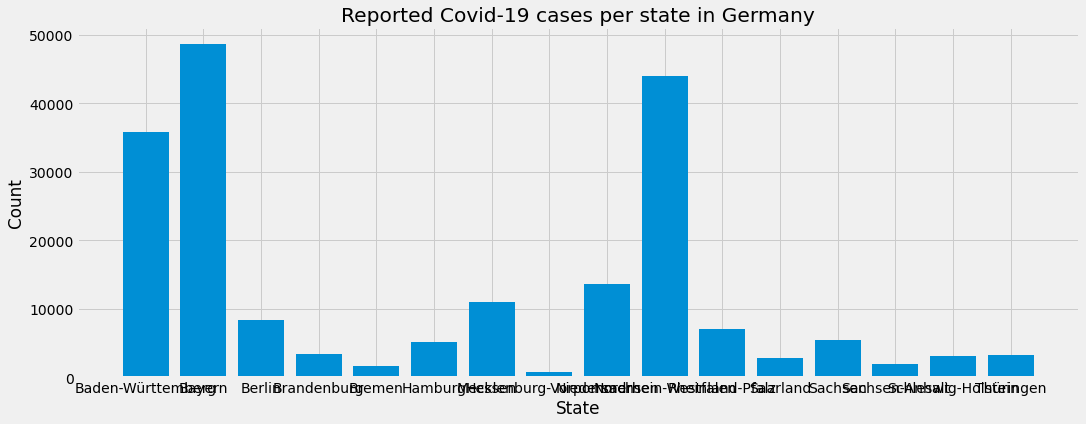

In [17]:
fig, ax = plt.subplots(1,1,figsize=(16,6)) # Step 2
ax.bar(cases_state['Bundesland'],cases_state['AnzahlFall']) #Step 3
ax.set_xlabel('State') # Step 4
ax.set_ylabel('Count')
ax.set_title('Reported Covid-19 cases per state in Germany')
plt.show() # Step 6

The x-axis is a bit messy since some of the state names are too long and overlap. So, let's flip the axes to solve this issue by using the `barh()` method for horizontal barplots.

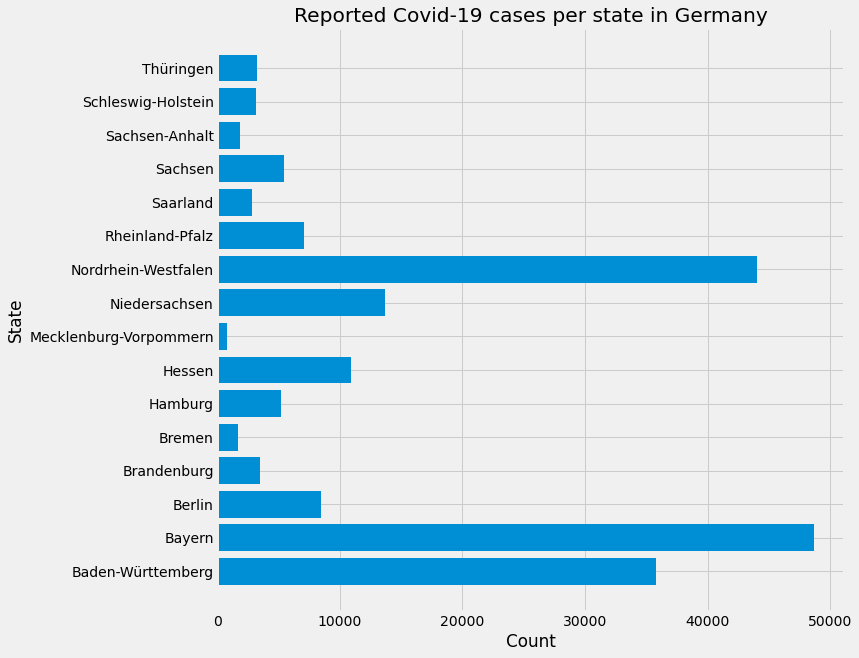

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10)) 
ax.barh(cases_state['Bundesland'],cases_state['AnzahlFall']) # barh() instead of bar()
ax.set_xlabel('Count')
ax.set_ylabel('State')
ax.set_title('Reported Covid-19 cases per state in Germany')
plt.show()

This look a lot better than our vertical bar plot. To further improve the readability of this chart, we sort the states by the number of cases instead of their alphabetical order. For this, we use the `sort_values()` method. 

In [19]:
cases_state_sorted = cases_state.sort_values('AnzahlFall')
cases_state_sorted

,Bundesland,AnzahlFall
7,Mecklenburg-Vorpommern,804
4,Bremen,1678
13,Sachsen-Anhalt,1880
11,Saarland,2805
14,Schleswig-Holstein,3181
15,Thüringen,3270
3,Brandenburg,3460
5,Hamburg,5220
12,Sachsen,5458
10,Rheinland-Pfalz,7080


Let's plot the result again.

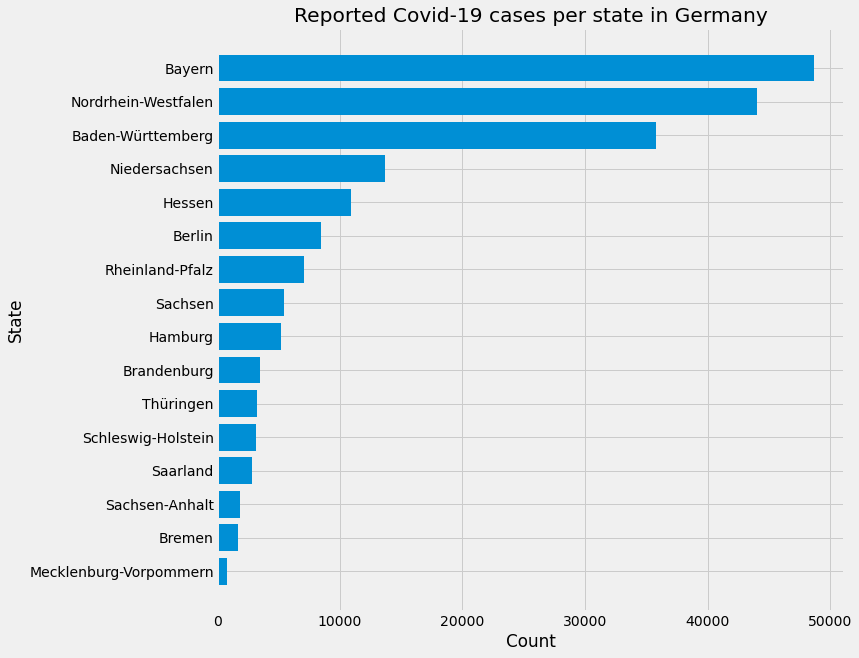

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.barh(cases_state_sorted['Bundesland'],cases_state_sorted['AnzahlFall'])
ax.set_xlabel('Count')
ax.set_ylabel('State')
ax.set_title('Reported Covid-19 cases per state in Germany')
plt.show()

In *matplotlib* you can easily overlay some plots by using multiple methods on the same *Axes* object. Let's split the confirmed number of cases into *infected*, *recovered* and *deceased* plot them in the same figure. For this task, we need the variables *Bundesland*, *AnzahlFall*, *AnzahlGenesen* und *AnzahlTodesfall*. Following the same procedure as before, we group the data by the variable *Bundesland* and add up all the cases. Then, we sort them by the variable *AnzahlFall*.

In [21]:
data_state = covid19[['Bundesland','AnzahlFall','AnzahlGenesen','AnzahlTodesfall']]
data_state = data_state.groupby('Bundesland').sum()
data_state = data_state.reset_index()
data_state_sorted = data_state.sort_values('AnzahlFall')

Let's have a look at the data.

In [22]:
data_state_sorted

,Bundesland,AnzahlFall,AnzahlGenesen,AnzahlTodesfall
7,Mecklenburg-Vorpommern,804,771,20
4,Bremen,1678,1585,53
13,Sachsen-Anhalt,1880,1783,59
11,Saarland,2805,2614,174
14,Schleswig-Holstein,3181,2989,152
15,Thüringen,3270,3039,181
3,Brandenburg,3460,3235,167
5,Hamburg,5220,4873,261
12,Sachsen,5458,5170,224
10,Rheinland-Pfalz,7080,6693,235


Now, we again create our *Figure* and one *Axes* object which will then be used for all plots. This way, we can simply overlay our 3 barplots by first plotting the largest bar, then the second largest and finally the smallest bars. We can do it this way because the variable *AnzahlFall* **includes** the other two variables. When overlaying the other two bar plots, we have to consider that those variables are **exclusive** which means we have to add the number of deaths to the recovered cases to report them correctly in an overlayed plot. 

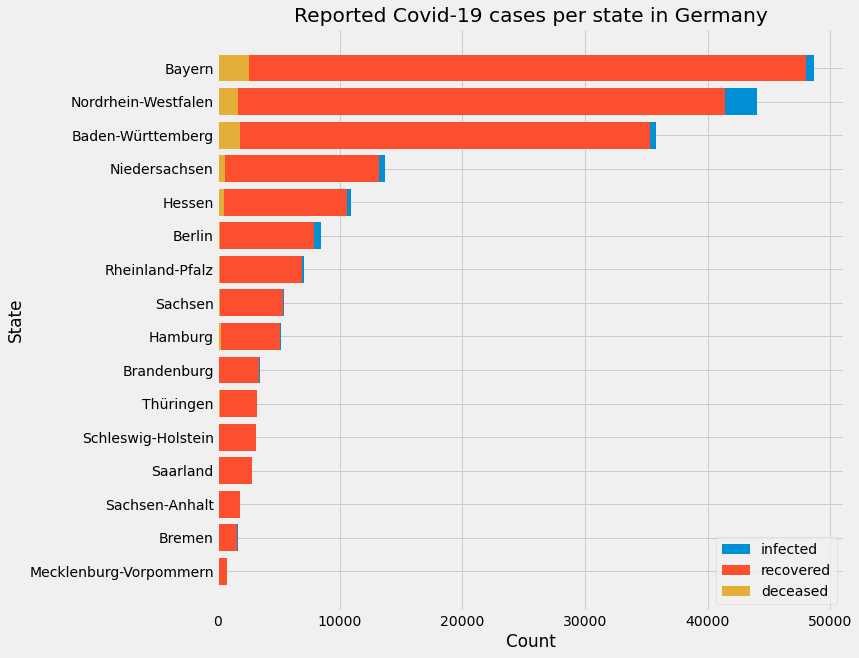

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

# Use same Axes object (ax) for all the 3 plots
ax.barh(data_state_sorted['Bundesland'],data_state_sorted['AnzahlFall'],label='infected')
ax.barh(data_state_sorted['Bundesland'],data_state_sorted['AnzahlGenesen']+data_state_sorted['AnzahlTodesfall'],label='recovered')
ax.barh(data_state_sorted['Bundesland'],data_state_sorted['AnzahlTodesfall'], label='deceased')
ax.set_xlabel('Count')
ax.set_ylabel('State')
ax.set_title('Reported Covid-19 cases per state in Germany');
ax.legend()
plt.show()

***Line plot***

In the previous example, we have looked at the cumulative cases which means we haven't captured the longitudinal aspect of our data. Therefore, we will here plot the cumulative cases over time and not just at the last time point. This means, we again need the variables *Bundesland*, *Meldedatum* and *AnzahlFall* for this task. Different from the task above, we now group the data by two variables *Bundesland* and *Meldedatum* to add the cases.

In [24]:
cases = covid19[['Bundesland', 'AnzahlFall', 'Meldedatum']].groupby(['Bundesland','Meldedatum'])['AnzahlFall'].sum()

Since this gives us the sum of cases per state and date, we have to group the data again to calculate the cumulative sums per state and date.

In [25]:
cases_cum = cases.groupby(level=0).cumsum()
cases_cum = cases_cum.reset_index()

Let's have a look at the data.

In [26]:
cases_cum.head(20)

,Bundesland,Meldedatum,AnzahlFall
0,Baden-Württemberg,2020-02-24,1
1,Baden-Württemberg,2020-02-25,3
2,Baden-Württemberg,2020-02-26,7
3,Baden-Württemberg,2020-02-27,10
4,Baden-Württemberg,2020-02-28,16
5,Baden-Württemberg,2020-02-29,18
6,Baden-Württemberg,2020-03-01,19
7,Baden-Württemberg,2020-03-02,29
8,Baden-Württemberg,2020-03-03,53
9,Baden-Württemberg,2020-03-04,91


Now, we can plot the temporal evolution of Covid-19 cases for individual states (e.g. Bavaria, Berlin) by first creating subsets of the data for the corresponding state and then using the method `plot()` to create the line charts. We overlay the line charts by using the same *Axes* object.

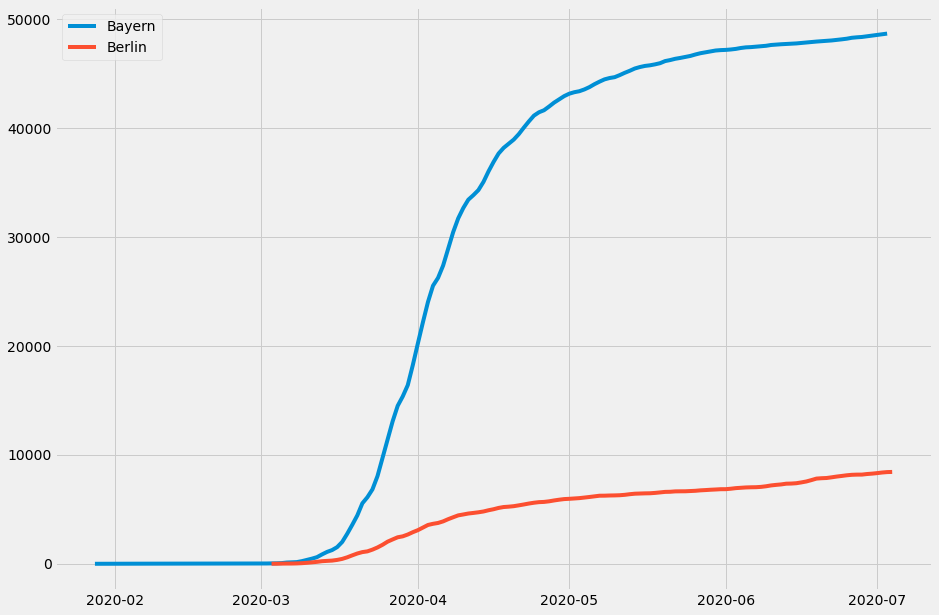

In [27]:
fig, ax = plt.subplots(1,1,figsize=(14,10))

bavaria = cases_cum[cases_cum['Bundesland']=='Bayern']
berlin = cases_cum[cases_cum['Bundesland']=='Berlin']
ax.plot(bavaria['Meldedatum'], bavaria['AnzahlFall'], label='Bayern')
ax.plot(berlin['Meldedatum'], berlin['AnzahlFall'], label='Berlin')
ax.legend()
plt.show()

If you want to plot a line for every state, you can use a *for-loop* to create the subsets and the line charts. You have to first create an array with unique state names which can be done by using *pandas* `unique()` method. 

In [28]:
states = cases_cum['Bundesland'].unique()

Then, you can simply loop through this array to create the subsets and the plots.

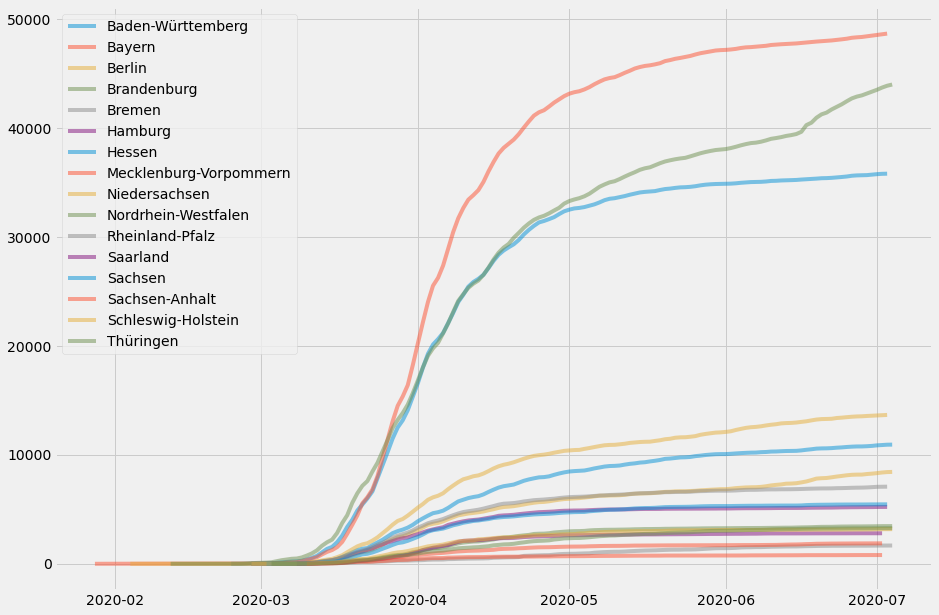

In [29]:
fig, ax = plt.subplots(1,1,figsize=(14,10))

for state in states:
    x = cases_cum[cases_cum['Bundesland']==state]['Meldedatum']
    y = cases_cum[cases_cum['Bundesland']==state]['AnzahlFall']
    ax.plot(x,y,label=state, alpha=0.5)
    
ax.legend()
plt.show()

#### 5. Save plots + 6. Show Plot

You can easily save your created figures by adding the function ```fig.savefig()``` to your code. The only argument you need to pass to the function is a complete path/just the file name (you then save it in your directory).

*Recommendation: Use vector-based graphics; so, you don't get blurry figures in your document later on (e.g. SVG, EPS, PDF)*

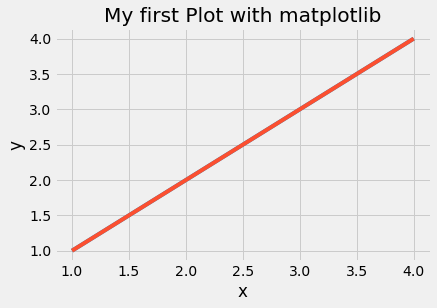

In [30]:
### Step 1: Prepare data
x = [1,2,3,4]
y = [1,2,3,4]

### Step 2: Create plot
# Initialize `Figure` and `Axes` object
fig, ax = plt.subplots(1,1) # Initializing the 'Figure' and 'Axes' objects 

### Step 3: Plot
ax.plot(x,y) # Line plot 

### Step 4: Customise plot
ax.plot(x, y); 
ax.set_xlabel('x'); #  Set label for x-axis 
ax.set_ylabel('y'); # Set label for y-axis
ax.set_title('My first Plot with matplotlib'); # Set title

### Step 5: Save plot
from pathlib import Path
Path("results/week1_session3_matplotlib").mkdir(parents=True, exist_ok=True)
fig.savefig('results/week1_session3_matplotlib/line.pdf', 
            format='pdf', 
            bbox_inches = 'tight'); # bbox_inches = 'tight' created a padding around the figure

### Step 6: Show plot
plt.show()

## 6. Discusison

In this notebook, data visualisation using the *matplotlib* library was introduced. The workflow to create a plot was presented using a step-by-step introduction.

- **Data Preparation:** We selected different data features from the RKI Covid-19 dataset.
- **Create Plot:** We instantiated *Figure* and *Axes* objects.
- **Plot:** We introduced different chart types.
- **Customisation:** We added axis labels, a title and a legend to our plots.
- **Save:** We saved our plots in an arbitrary image format.



## 7. Exercises

Now, it's time for you to get your hands dirty. Please answer the following questions by choosing a **suitable graphical representation** of the data *(think about scales)* including axis labels, title and legend (if necessary).

*Tip:* The following resources might be helpful:
- www.stackoverflow.com
- matplotlib documentation: https://matplotlib.org/api/axes_api.html

1) **Create a Covid-19 subset of Berlin.** <br>

2) **Plot the Covid-19 cases by sex in Berlin.** 

2.1 Select the required variables and store them in a separate dataframe.

2.2 Group the data by sex and take the sum of the required variable.

2.3 Plot the data.

**3) Plot the Covid-19 cases by age group in Berlin.**

3.1 Select the required variables and store them in a separate dataframe.

3.2 Group the data by age group and take the sum of the required variable.

3.3 Plot the data.

4) **Plot the cumulative cases by age group over time.**

4.1 Select the required variables and store them in a separate dataframe.

4.2 Group the data by age group as well as reporting date and take the sum of the required variable.

4.3 Group the data again by *level=0* and take the cumulative sum.



4.4 Reset the index of the resulting dataframe.

4.5 Create an array with unique ages groups.

4.6 Loop through the age group array and plot the data.

## 8. Solutions

**1) Create a Covid-19 subset of Berlin.**

In [32]:
berlin = covid19[covid19['Bundesland']=='Berlin']

**2) Plot the Covid-19 cases by sex in Berlin.**

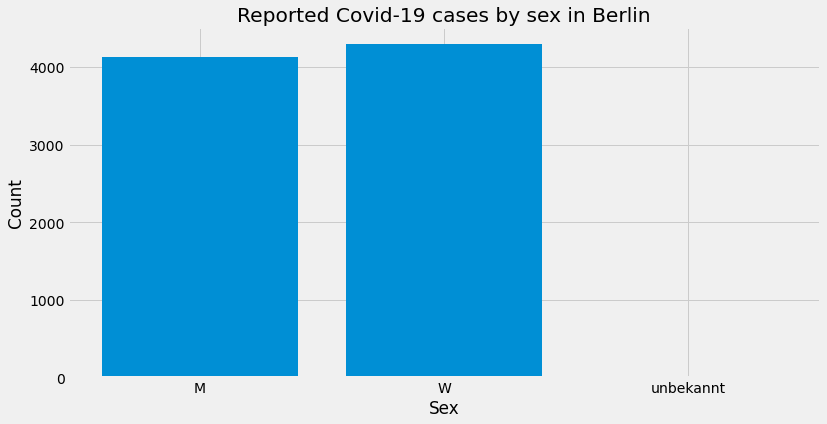

In [33]:
### 2.1
berlin_cases = berlin[['Geschlecht', 'AnzahlFall']]

### 2.2
berlin_cases_sex = berlin_cases.groupby('Geschlecht').sum().reset_index()

### 2.3
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.bar(berlin_cases_sex['Geschlecht'], berlin_cases_sex['AnzahlFall'])
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Reported Covid-19 cases by sex in Berlin')
plt.show()

**3) Plot the Covid-19 cases by age group in Berlin.**

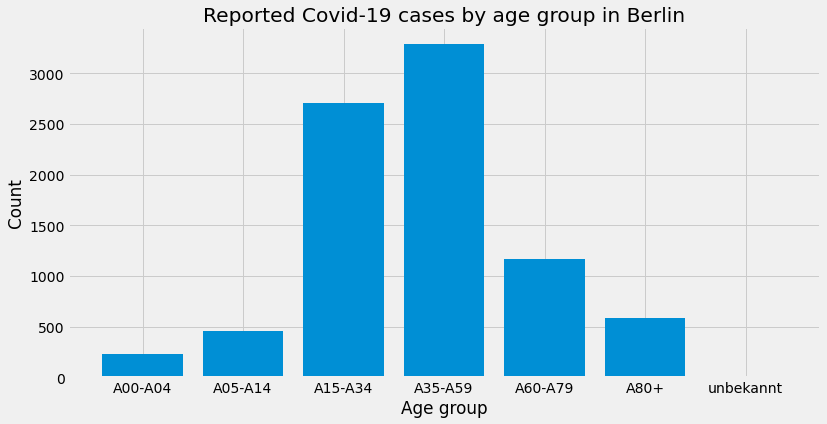

In [34]:
### 3.1
berlin_cases = berlin[['Altersgruppe','AnzahlFall']]


### 3.2
berlin_cases_age = berlin_cases.groupby('Altersgruppe')['AnzahlFall'].sum().reset_index()

### 3.3
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.bar(berlin_cases_age['Altersgruppe'], berlin_cases_age['AnzahlFall'])
ax.set_xlabel('Age group')
ax.set_ylabel('Count')
ax.set_title('Reported Covid-19 cases by age group in Berlin')
plt.show()


**4) Plot the cumulative cases by age group over time.**

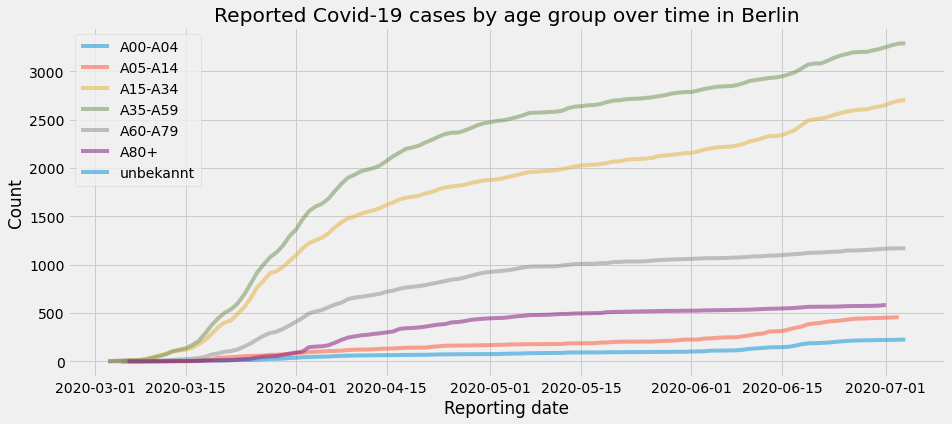

In [35]:
### 4.1
berlin_cases = berlin[['Altersgruppe','AnzahlFall','Meldedatum']]
### 4.2
berlin_cases_grouped = berlin_cases.groupby(['Altersgruppe','Meldedatum'])['AnzahlFall'].sum()
### 4.3
berlin_cases_cum = berlin_cases_grouped.groupby(level=0).cumsum()
### 4.4
berlin_cases_cum = berlin_cases_cum.reset_index()
### 4.5
age_groups = berlin_cases_cum['Altersgruppe'].unique()
### 4.6
fig, ax= plt.subplots(1,1,figsize=(14,6))

for age_group in age_groups:
    x = berlin_cases_cum[berlin_cases_cum['Altersgruppe']==age_group]['Meldedatum']
    y = berlin_cases_cum[berlin_cases_cum['Altersgruppe']==age_group]['AnzahlFall']
    ax.plot(x,y,label=age_group, alpha=0.5)

ax.set_xlabel('Reporting date')
ax.set_ylabel('Count')
ax.set_title('Reported Covid-19 cases by age group over time in Berlin')
ax.legend()
plt.show()